#**Colab 準備資料集**

In [1]:
!wget https://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz

--2024-10-31 06:41:34--  https://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 216.165.22.6
Connecting to yann.lecun.com (yann.lecun.com)|216.165.22.6|:443... connected.
ERROR: cannot verify yann.lecun.com's certificate, issued by ‘CN=R11,O=Let's Encrypt,C=US’:
  Issued certificate has expired.
To connect to yann.lecun.com insecurely, use `--no-check-certificate'.


In [3]:
##解壓縮檔案
!gzip -d train-images-idx3-ubyte.gz

gzip: train-images-idx3-ubyte.gz: No such file or directory


#檢視訓練集圖案二進位資料
###從二進位中讀取第一筆圖像資料

- 從二進位資料中，取得image_size的數值(資料數量=60000)
- 從二進位資料中，取得image_width的數值(寬度=28)
- 從二進位資料中，取得image_heigth的數值(高度=28)


In [6]:
#使用numpy工具
import numpy as np

#設定檔案名稱
trainimagefile='train-images-idx3-ubyte'

#讀取二進位資料
imageBytes = np.fromfile(trainimagefile, dtype=np.uint8)

In [10]:
#從二進位中取得整數
image_size = int.from_bytes(imageBytes[4:8], byteorder='big')
image_width = int.from_bytes(imageBytes[8:12], byteorder='big')
image_height = int.from_bytes(imageBytes[12:16], byteorder='big')

#計算像素長度
image_length = image_width * image_height

print(f'資料數量:{image_size}, 圖片寬度:{image_width}, 圖片高度:{image_height}, 圖片長度:{image_length}')

資料數量:60000, 圖片寬度:28, 圖片高度:28, 圖片長度:784


In [12]:
#圖片集合
images = []

#圖像起點的偏移位置
image_offset = 16

#使用迴圈取得每一張圖像
for i in range(image_size):

  #計算圖像的起點座標和終點座標
  start = image_offset + (image_length * i)
  end = start + image_length
  image_pixels = imageBytes[start:end]

  #加入到集合
  images.append(image_pixels)

#輸出圖像集合的數量
print(f'The images count is {len(images)}')

The images count is 60000


In [14]:
#指定images[0]的圖像
image = images[0]

#使用列表解析和join函數格式化輸出，並補齊3位數
formatted_image = '\n'.join([' '.join([f'{value:03}' for value in row]) for row in image.reshape(28, 28)])

#輸出格式化後圖片
print(formatted_image)

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
000 000 000 000 000 000 000 000 000 000 000 000 003 018 018 018 126 136 175 026 166 255 247 127 000 000 000 000
000 000 000 000 000 000 000 000 030 036 094 154 170 253 253 253 253 253 225 172 253 242 195 064 000 000 000 000
000 000 000 000 000 000 000 049 238 253 253 253 253 253 253 253 253 251 093 082 082 056 039 000 000 000 000 000
000 000 000 000 000 000 000 018 219 253 253 253 253 253 198 182 247 241 000 000 000 000 000 000 000 000 

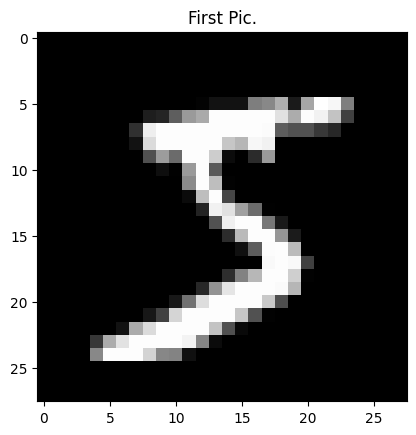

In [16]:
#使用pyplot來顯示images
import matplotlib.pyplot as plt

#指定images[0]的圖像
image = images[0]

#將圖像視為灰階圖像，使用灰度顏色映射(cmap='gray')
plt.imshow(image.reshape(28, 28),cmap='gray')

#添加標題
plt.title('First Pic.')

#顯示圖案
plt.show()


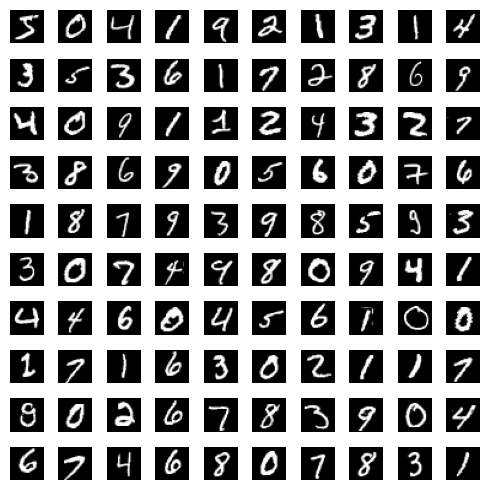

In [17]:
import matplotlib.pyplot as plt

#顯示前100張圖
num_images_to_display = 100
num_images_to_display = images[:num_images_to_display]

#設定10*10得子圖網格
num_rows, num_cols = 10, 10

#建立一個圖像
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 5))

#在每個子圖上顯示一張圖片
for i in range(num_rows):
  for j in range(num_cols):
    index = i * num_cols + j
    ax = axes[i,j]
    ax.imshow(num_images_to_display[index].reshape(28,28),cmap='gray')
    ax.axis('off')  #隱藏座標

#調整子圖之間的間距
plt.tight_layout()

#顯示圖像
plt.show()


上圖為MNIST的資料集